In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/suppliers/suppliers.xlsx


In [2]:
df = pd.read_excel('/kaggle/input/suppliers/suppliers.xlsx')

In [3]:
df.head()

,Number,Supplier Code,Supplier Name,Business Area,Cost/Price,Srvice_Cooperation,Conforming_Service,Flexibility,After_sale_service,Complaint_Management,Waiting_Time
0,1,V00005,نیان الکترونیک,Electrical Equipments,9157000,80,100,0,60,60,100
1,2,V00013,نکو نیرو توان (نکا نوین),Electrical Equipments,5731000,40,80,80,80,80,80
2,3,V00014,ماشین سنگین آریا,Electrical Generators,194929000,40,80,80,80,80,60
3,4,V00016,شرکت فرصت موج گستر,Electrical Tools,20464000,80,60,40,80,80,60
4,5,V00021,اسپارک ماشین تول (فتح ایران),Construction Installations,10442000,40,60,100,60,60,80


In [4]:
df.shape

(472, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Number                472 non-null    int64 
 1   Supplier Code         472 non-null    object
 2   Supplier Name         472 non-null    object
 3   Business Area         472 non-null    object
 4   Cost/Price            472 non-null    int64 
 5   Srvice_Cooperation    472 non-null    int64 
 6   Conforming_Service    472 non-null    int64 
 7   Flexibility           472 non-null    int64 
 8   After_sale_service    472 non-null    int64 
 9   Complaint_Management  472 non-null    int64 
 10  Waiting_Time          472 non-null    int64 
dtypes: int64(8), object(3)
memory usage: 40.7+ KB


**Header details**

 
C1	Financial Elements (Price/
Cost)	Financial elements such as the price of the product, the cost of the maintenance, transportation costs, etc. are one of the discriminant factors for selecting the supplier	Minimum

C2	Service cooperation	Cooperating with the terms and conditions	Maximum

C3	Conforming service	Achieving quality perception	Maximum

C4	Flexibility	Supplier’s flexibility concerning multiple elements such as costs, time,	Maximum

C5	After sale services	Receiving the guarantee / warranty services in the future	Maximum

C6	Complaint management	Number of complaints regarding the supplier 	Minimum

C7	Waiting Time	Wating time for the product 	Minimum


All the other variables rated on the following scale based on database values
Very Poor = 0
Poor = 40
Moderate = 60 
Good = 80 
Very Good = 100


In [6]:
df.isnull().sum()

Number                  0
Supplier Code           0
Supplier Name           0
Business Area           0
Cost/Price              0
Srvice_Cooperation      0
Conforming_Service      0
Flexibility             0
After_sale_service      0
Complaint_Management    0
Waiting_Time            0
dtype: int64

In [7]:
df.describe()

,Number,Cost/Price,Srvice_Cooperation,Conforming_Service,Flexibility,After_sale_service,Complaint_Management,Waiting_Time
count,472.000000,4.720000e+02,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000
mean,263.572034,4.277402e+07,63.728814,69.025424,69.025424,68.220339,69.279661,75.762712
std,157.567049,5.414349e+07,19.496708,17.014525,15.499585,16.491977,15.403634,14.241280
min,1.000000,5.300000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000
25%,127.750000,9.223000e+06,60.000000,60.000000,60.000000,60.000000,60.000000,80.000000
50%,261.500000,2.650250e+07,60.000000,80.000000,80.000000,80.000000,80.000000,80.000000
75%,395.250000,5.552600e+07,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
max,548.000000,4.920000e+08,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [8]:
df.columns

Index(['Number', 'Supplier Code', 'Supplier Name ', 'Business Area',
       'Cost/Price', 'Srvice_Cooperation', 'Conforming_Service', 'Flexibility',
       'After_sale_service', 'Complaint_Management', 'Waiting_Time'],
      dtype='object')

In [9]:
selected_columns_df = df[['Cost/Price', 'Srvice_Cooperation', 'Conforming_Service', 'Flexibility',
       'After_sale_service', 'Complaint_Management', 'Waiting_Time']]

In [10]:
# filtered the numerical features
selected_columns_df

,Cost/Price,Srvice_Cooperation,Conforming_Service,Flexibility,After_sale_service,Complaint_Management,Waiting_Time
0,9157000,80,100,0,60,60,100
1,5731000,40,80,80,80,80,80
2,194929000,40,80,80,80,80,60
3,20464000,80,60,40,80,80,60
4,10442000,40,60,100,60,60,80
...,...,...,...,...,...,...,...
467,83135000,60,80,80,80,80,80
468,50687000,40,60,60,60,60,80
469,66865000,60,80,80,80,80,80
470,53640000,100,60,80,60,60,40


Now, we need to standardize it

In [11]:
from sklearn import preprocessing
#Scale the data to suppress the effect of variables with higher scale / variables in different units
scaler = preprocessing.StandardScaler().fit(selected_columns_df)
scaled_df = pd.DataFrame(scaler.fit_transform(selected_columns_df),columns=selected_columns_df.columns, index=selected_columns_df.index)


In [12]:
scaled_df

,Cost/Price,Srvice_Cooperation,Conforming_Service,Flexibility,After_sale_service,Complaint_Management,Waiting_Time
0,-0.621546,0.835446,1.822410,-4.458097,-0.498974,-0.603072,1.703709
1,-0.684890,-1.218359,0.645697,0.708807,0.715024,0.696700,0.297851
2,2.813199,-1.218359,0.645697,0.708807,0.715024,0.696700,-1.108007
3,-0.412491,0.835446,-0.531017,-1.874645,0.715024,0.696700,-1.108007
4,-0.597788,-1.218359,-0.531017,2.000534,-0.498974,-0.603072,0.297851
...,...,...,...,...,...,...,...
467,0.746236,-0.191456,0.645697,0.708807,0.715024,0.696700,0.297851
468,0.146303,-1.218359,-0.531017,-0.582919,-0.498974,-0.603072,0.297851
469,0.445419,-0.191456,0.645697,0.708807,0.715024,0.696700,0.297851
470,0.200901,1.862349,-0.531017,0.708807,-0.498974,-0.603072,-2.513865


# Clustering

In [13]:
from sklearn.cluster import KMeans

# Elbow Plot

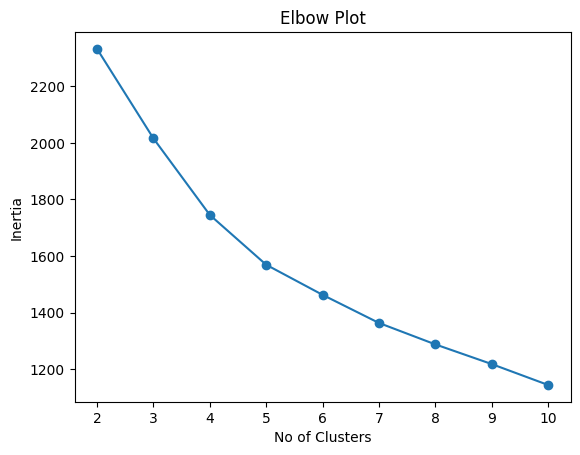

In [14]:
inertial_values = [] #sum of squared distances to the nearest centroid
k_values = range(2,11)

for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(scaled_df)
    inertial_values.append(kmeans.inertia_)

#plotiing the elbow plot
plt.plot(k_values, inertial_values, marker = 'o')
plt.title('Elbow Plot')
plt.xlabel('No of Clusters')
plt.ylabel('Inertia')
plt.show()

# Silhouette Score

In [15]:
from sklearn.metrics import silhouette_score

In [16]:
silhouette_scores = []
k_values = range(2,10)

for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(scaled_df)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(scaled_df, labels)
    silhouette_scores.append(silhouette_avg)
    print('For K = ', k , 'The Silhouette Score is ',silhouette_avg)
    
    optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print('==========================================================')
print('The Optimal number of cluster is : ',optimal_k)

For K =  2 The Silhouette Score is  0.29686655889851044
For K =  3 The Silhouette Score is  0.2549982340397343
For K =  4 The Silhouette Score is  0.28581374113395525
For K =  5 The Silhouette Score is  0.2826390905460541
For K =  6 The Silhouette Score is  0.28615035713767134
For K =  7 The Silhouette Score is  0.22674469239127762
For K =  8 The Silhouette Score is  0.2338168206843646
For K =  9 The Silhouette Score is  0.2398660910431641
The Optimal number of cluster is :  2


We should consider either K = 3 or 4, lets begin our analysis with K=3

In [17]:
k = 3
model = KMeans(n_clusters=k,random_state=42)
model.fit(scaled_df)

KMeans(n_clusters=3, random_state=42)

In [18]:
centroidk3 = model.cluster_centers_

In [19]:
scaled_df['Cluster_ID1'] = model.labels_

In [20]:
scaled_df.head()

,Cost/Price,Srvice_Cooperation,Conforming_Service,Flexibility,After_sale_service,Complaint_Management,Waiting_Time,Cluster_ID1
0,-0.621546,0.835446,1.822410,-4.458097,-0.498974,-0.603072,1.703709,2
1,-0.684890,-1.218359,0.645697,0.708807,0.715024,0.696700,0.297851,0
2,2.813199,-1.218359,0.645697,0.708807,0.715024,0.696700,-1.108007,0
3,-0.412491,0.835446,-0.531017,-1.874645,0.715024,0.696700,-1.108007,2
4,-0.597788,-1.218359,-0.531017,2.000534,-0.498974,-0.603072,0.297851,2


In [21]:
scaled_df.to_excel('Suppliers_clusteredk3.xlsx', index = False)

In [22]:
centroidk3

array([[ 0.17985903,  0.17048466,  0.64569659,  0.50234295,  0.71004858,
         0.74996946,  0.29208959],
       [-0.07441589, -1.05621649, -1.87288312, -1.17212724, -1.5425855 ,
        -1.67481467, -1.00935015],
       [-0.23183566,  0.1088075 , -0.29705046, -0.32608436, -0.49897357,
        -0.51186031, -0.08033276]])

In [23]:
col_names = selected_columns_df.columns.tolist()
cluster_profile = pd.DataFrame(centroidk3,columns= col_names)

In [24]:
cluster_profile

,Cost/Price,Srvice_Cooperation,Conforming_Service,Flexibility,After_sale_service,Complaint_Management,Waiting_Time
0,0.179859,0.170485,0.645697,0.502343,0.710049,0.749969,0.292090
1,-0.074416,-1.056216,-1.872883,-1.172127,-1.542586,-1.674815,-1.009350
2,-0.231836,0.108808,-0.297050,-0.326084,-0.498974,-0.511860,-0.080333


In [25]:
cluster_profile.to_excel('cluster_profilek3.xlsx', index = False)

Now we would do the same for K = 4 i.e with 4 clusters

In [26]:
k = 4
model2 = KMeans(n_clusters=k,random_state=42)
model2.fit(scaled_df.drop('Cluster_ID1', axis = 1))

KMeans(n_clusters=4, random_state=42)

In [27]:
centroidk4 = model2.cluster_centers_

In [28]:
scaled_df['Cluster_ID2'] = model2.labels_

In [29]:
scaled_df.head()

,Cost/Price,Srvice_Cooperation,Conforming_Service,Flexibility,After_sale_service,Complaint_Management,Waiting_Time,Cluster_ID1,Cluster_ID2
0,-0.621546,0.835446,1.822410,-4.458097,-0.498974,-0.603072,1.703709,2,3
1,-0.684890,-1.218359,0.645697,0.708807,0.715024,0.696700,0.297851,0,0
2,2.813199,-1.218359,0.645697,0.708807,0.715024,0.696700,-1.108007,0,2
3,-0.412491,0.835446,-0.531017,-1.874645,0.715024,0.696700,-1.108007,2,3
4,-0.597788,-1.218359,-0.531017,2.000534,-0.498974,-0.603072,0.297851,2,3


In [30]:
scaled_df.to_excel('Suppliers_clusteredk4.xlsx', index = False)

In [31]:
centroidk4

array([[-0.20322248,  0.17428971,  0.6242041 ,  0.46697736,  0.72056735,
         0.73824534,  0.28501242],
       [-0.20865163, -0.81652756, -2.01469908, -1.14453889, -1.50184111,
        -1.81807716, -1.59700101],
       [ 2.79701618,  0.14159307,  0.55028739,  0.35969219,  0.45253802,
         0.48592618,  0.22185897],
       [-0.2905053 , -0.03440072, -0.37873632, -0.37016391, -0.62037333,
        -0.56484381,  0.01667967]])

In [32]:
col_names = selected_columns_df.columns.tolist()
cluster_profile2 = pd.DataFrame(centroidk4,columns= col_names)

In [33]:
cluster_profile2.to_excel('cluster_profilek4.xlsx', index = False)